Out-of-the-Box Office:
    PRANJAL CHAKRABORTY 210010051
    SHREYASH LIPARE 210010060
    KANIKA GUPTA 210010032
    PRASHASTI ABOJWAR 210010004
    
    EFFECT OF THE PANDEMIC ON MOVIE BOX OFFICE NUMBERS

INTRODUCTION
This project is based on the analysis of movie box-office numbers and the effect that Covid has had on these numbers. For this, we have collected the gross box office income and the IMDB ratings of movies from the years 2018-22. We have colleted our data from a website called 'Box Office Mojo' (boxofficemojo.com). Box Office Mojo collects it's data from various sources such as production companies, distributors, exhibitors etc and is acknowledged as the most accurate and reliable source of box office data on the internet. We have about 450 data points

We will begin our project with an exploratory analysis and various pictorial representations of our data, so that the trends and inter-relations can be illustrated. After that, we will try and estimate the various population parameters and find confidence intervals for the same based on the data we have collected. Then, we would try to establish a regression between the two random variables we have, and try to see to what degree they are related and how one varies with the other. And finally we would test the hypothesis that the pandemic has had a negative effect on the numbers.

Here's what our data looks like in a tabulated form:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
movies=pd.read_csv('Out-of-the-box Office - Sheet1.csv',header=0, sep=',')
movies= movies[movies['IMDB Rating'].notna()]

In [2]:
movies

,Movie Name,Year,Month,Date,Wide Release (Yes/No),Genre,Net Gross (Domestic),Net Gross (Worldwide),Budget,Flop/Hit/Average,Category(Tentpole/Indie/Midlevel),IMDB Rating,Superhero Movie(Y/N)
0,Insidious: The Last Key,2018,Jan,5,yes,Horror Mystery Thriller,67745330,167885588,NaN,hit,tentpole,5.7,NaN
1,Molly's Game,2018,Jan,5,yes,Biography Crime Drama Sport,28780744,59284015,NaN,hit,tentpole,7.4,NaN
2,The Room,2018,Jan,10,no,Drama,549602,1301103,NaN,avg,Mid,6.0,NaN
3,Alien Intrusion: Unmasking a Deception,2018,Jan,11,yes,Documentary,237411,237411,NaN,flop,Mid,4.5,NaN
4,The Commuter,2018,Jan,12,yes,Action Mystery Thriller,36343858,119942387,NaN,hit,tentpole,6.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Morbius,2022,April,1,Yes,Action Adventure Horror Sci-Fi Thriller,"$71,932,763","$161,932,763",NaN,Hit,Tentpole,5.1,Y
420,Sonic the Hedgehog 2,2022,April,8,Yes,Action Adventure Comedy Family Fantasy Sci-Fi,"$163,701,471","$326,301,471",NaN,Hit,Tentpole,6.8,NaN
421,Ambulance,2022,April,8,Yes,Action Crime Drama Thriller,"$21,416,920","$50,188,920",NaN,Avg,Mid,6.2,NaN
422,Everything Everywhere All at Once,2022,April,8,Yes,Action Adventure Comedy Fantasy Sci-Fi,"$38,242,599","$41,749,910",NaN,Avg,Mid,8.8,NaN


The net gross is the total value of tickets sold in a movie. The 'worldwide' within parantheses refers to tickets sold all over the world, while 'domestic' refers to tickets sold in the USA. We will work with Worldwide Gross in this project, because that we feel will paint a more representative picture. The net gross can be taken to be an indicator of the 'popularity' of a movie. The data is in dollars throughout.

IMDB rating, on the other hand is a rating assigned to more or less every movie that comes out by IMDb, which is an online database of information related to films, television series, home videos, video games, and streaming content online. Box Office Mojo, the website from which we have collected our data, is a subsidiary of IMDb. IMDb follows a system of rating where they accept ratings on a scale of 1-10 from both the public and movie critics, with more weight presumably(IMDb does not reveal the exact mechanism) given to critcs' votes. The ratings thus strike a balance between the critics' possible snobbery and the everyman's general limitations of knowledge and can be considered a fair metric to judge the merits of a movie.

We would have liked to use the budget value and explore the relation between the budget and the profits and also explore profits across genres(test the hypothesis that the average profit in a certain genre is much greater than that in other genres), but due to lack of availability of credible data on movie budgets, we had to discard those ideas.

Here is a pictorial representation and description of our data:

In [3]:
y=movies['Net Gross (Worldwide)'].to_numpy()
for i in range(len(y)):
    s=''
    if type(y[i])!=float:
        for j in y[i]:
            if 48<=ord(j)<=57: s+=j
        y[i]=float(s)
y=y.astype('float64') 
x=movies['IMDB Rating'].to_numpy()
movies['Net Gross (Worldwide)']=y

In [ ]:
NET GROSS SAMPLE DESCRIPTION

In [4]:
movies['Net Gross (Worldwide)'].describe()

count    4.230000e+02
mean     1.377656e+08
std      2.850082e+08
min      0.000000e+00
25%      4.150976e+06
50%      3.354246e+07
75%      1.320665e+08
max      2.797501e+09
Name: Net Gross (Worldwide), dtype: float64

NET GROSS DISTRIBUTION

(0.0, 1000000000.0)

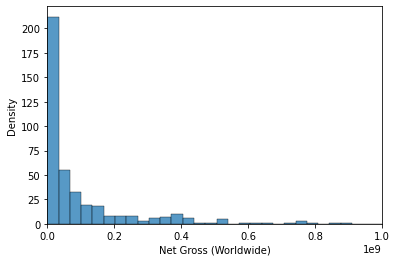

In [6]:
sns.histplot(movies, x = y)
plt.ylabel('Density')
plt.xlabel('Net Gross (Worldwide)')
plt.xlim( [ 0, 1e+09 ] )

In [7]:
movies['IMDB Rating'].describe()

count    423.000000
mean       6.322459
std        1.059371
min        1.700000
25%        5.700000
50%        6.400000
75%        7.000000
max        9.100000
Name: IMDB Rating, dtype: float64

In [ ]:
IMDB RATING DISTRIBUTION

Text(0.5, 0, 'IMDB Rating')

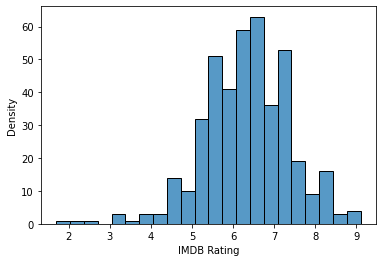

In [8]:
sns.histplot(movies, x = x)
plt.ylabel('Density')
plt.xlabel('IMDB Rating')

In [ ]:
JOINT DISTRIBUTION

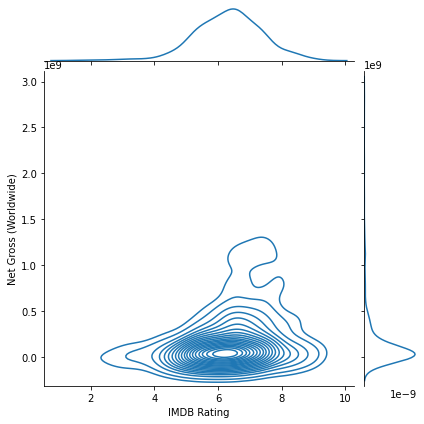

In [9]:
sns.jointplot(data=movies, x='IMDB Rating', y='Net Gross (Worldwide)', kind='kde', levels=20)

REGRESSION
Now we try and explore quantitatively the relation between the two random variables. We will only use data from the years 2018 and 2019 first, because here we are interested in discovering the general relationship between Gross and the Ratings, and do not want the added chaos of the pandemic. Later we will again repeat the same excercise with the entire data set, and see to what extent inclusion of pandemic data changes the conclusions we reach based on pre-pandemic data.

In [10]:
movies_before_pandemic=movies[movies.Year.isin([2018,2019])]

Text(0.5, 0, 'IMDB Rating')

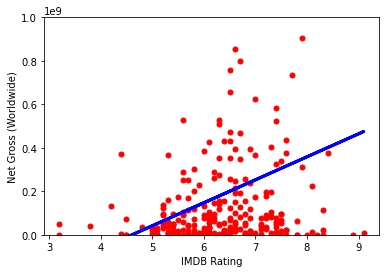

In [12]:
y=movies_before_pandemic['Net Gross (Worldwide)'].to_numpy()
x=movies_before_pandemic['IMDB Rating'].to_numpy()
plt.ylim( [ 0, 1e+09 ] )
b1, b0 = np.polyfit(x, y, 1)
plt.plot(x, y, 'ro', markersize=5)
plt.plot(x, b0 + b1*x, 'b-', lw=3)
plt.ylabel('Net Gross (Worldwide)')
plt.xlabel('IMDB Rating')


By looking at the graph, we can tell that the fit is far from perfect. This hunch can be verified by looking at the Coefficient of Determination(R2), which is a value between 0 and 1.The closer this value is to 1, the better is the fit. And if the value is close to 0, the regression is not a very good fit.

In [13]:
def compute_R2(x, y):
    b1, b0 = np.polyfit(x, y, 1)
    y_bar = np.mean(y)
    y_hat = b0 + b1*x
    ssr = np.sum((y_hat - y_bar)**2)
    sst = np.sum((y - y_bar)**2)
    r2 = ssr/sst
    return r2

In [14]:
compute_R2(x,y)

0.08408377648637438

As we can see that this is a very bad fit. So the relation between ratings and box-office gross is definitely not linear. However, what we can see is that there is a possibility that Gross more or less increases with IMDB rating. This isn't trivial, as a lot of the times, movies that do not find much critical acclaim (and hence have low IMDB ratings) are very popular with the people and make a lot of money. So this is what we test next as a hypothesis.

H0: There is no relation between IMDB Rating and Box Office Gross have no relation ie b1=0
Ha: Gross increases with IMDB Rating ie b1>0

alpha=0.05

Test Statistic: T=(B1-b1)/(S/sqrt(Sxx)) where B1 is the observed value and b1 is 0 according to the null hypothesis.




In [15]:
import scipy.stats as stats
sxx = np.sum((x - np.mean(x))**2)
S = np.sqrt(np.sum((y - b0 - b1*x)**2)/(len(x) - 2))
T = b1/(S/np.sqrt(sxx))
t_dist = stats.t(df=len(x)-2)
p_value = 1 - t_dist.cdf(T)
p_value

1.56238053861113e-06

P-value: (as calculated above)

Thus, the p-value is much less than the level of significance alpha. So, we reject the null hypothesis and establish with somewhat confidence that as IMDB ratings increase, the Gross more or less increases and isn't completely unrelated to it.


 Now, let's do all the same things with data from the pamdemic included.

In [17]:
y=movies['Net Gross (Worldwide)'].to_numpy()
x=movies['IMDB Rating'].to_numpy()

Text(0.5, 0, 'IMDB Rating')

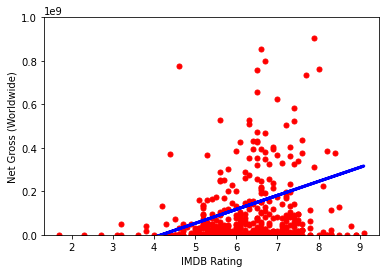

In [18]:
plt.ylim( [ 0, 1e+09 ] )
b1, b0 = np.polyfit(x, y, 1)
plt.plot(x, y, 'ro', markersize=5)
plt.plot(x, b0 + b1*x, 'b-', lw=3)
plt.ylabel('Net Gross (Worldwide)')
plt.xlabel('IMDB Rating')


In [19]:
compute_R2(x,y)

0.057063681921571754

In [20]:
sxx = np.sum((x - np.mean(x))**2)
S = np.sqrt(np.sum((y - b0 - b1*x)**2)/(len(x) - 2))
T = b1/(S/np.sqrt(sxx))
t_dist = stats.t(df=len(x)-2)
p_value = 1 - t_dist.cdf(T)
p_value

3.336577971690957e-07

Although the fit now is a little worse, inclusion of pandemic data does not significantly affect or alter our conclusions.

# Hypothesis Testing

In [ ]:
movies_before_pandemic=movies[movies.Year.isin([2018,2019])]
y1=movies_before_pandemic['Net Gross (Worldwide)'].to_numpy()
x1=movies_before_pandemic['IMDB Rating'].to_numpy()

In [ ]:
movies_after_pandemic=movies[movies.Year.isin([2020,2021,2022])]
y2=movies_after_pandemic['Net Gross (Worldwide)'].to_numpy()
x2=movies_after_pandemic['IMDB Rating'].to_numpy()

In [164]:
Rmean1=np.mean(y1) ; print(Rmean1)

184142925.96385542


In [168]:
RmeanR1=np.mean(x1) ; print(RmeanR1)

6.402811244979921


In [165]:
Rmean2=np.mean(y2) ; print(Rmean2)

62621334.4127907


In [167]:
RmeanR2=np.mean(x2) ; print(RmeanR2)

6.20174418604651


Hypothesis Testing on Gross Income

This will give us an idea about the effect of pandemic before and after pandemic movies. Here we will get a proper analytical approach.We perform a hypothesis test of the mean of year (2018,2019)  and (2020,2021,2022). Mean of this two is equal implies there was no effect of pandemic on box office movies.

 Null Hypothesis: H0 : mean1=mean2
 Alternate Hypothesis: H1 : ρ mean1>=mean2
 What does our Hypothesis mean qualitatively?
 Null Hypothesis: H0 : This means that there is no significant effect of pandamic on cinemas and its income.
 Alternate Hypothesis: H1 : This means that pandemic has significantly affect post pandemic movies in there income.
Using p-value to make decision with Significance Level 5%
1. If the p-value is less than the significance level(α = 0.05):
Decision: Reject the null hypothesis.
Conclusion:There is sufficient evidence to conclude that there is a significant linear relationship.

2. If the p-value is NOT less than the significance level:
Decision: WE FAIL TO REJECT the null hypothesis.
Conclusion: There is INSUFFICIENT EVIDENCE to conclude that
there is a significant linear relationship.

### What is Gross income?
To determine if a movie made a profit, it is not correct to directly compare the box office gross with the production budget, because the movie theater keeps nearly half of the gross on average. Gross refers to gross earnings. On average, the movie's distributor receives a little more than half of the final gross (often referred to as the rentals) with the remainder going to the exhibitor (i.e., movie theater).

z= (mean1-mean2)-(Rmean1-Rmean2)/sqrt(var(y1)/len(y1)+var(t2)/len(y2))

y1 is gross income in 2018 and 2019 . y2 is gross income in 2020,2021 and 2022.

as we our null hypothesis is mean1=mean2,so z becomes

In [160]:
z=-(Rmean1-Rmean2)/sqrt(var(y1)/len(y1)+var(y2)/len(y2))

Rmean1 and Rmean2 is mean of our data fro 2018,2019 and 2020,2021,2022.

In [163]:
pvalue=stats.t.pdf(z,df=len(DATA)-1) ; print(pvalue)

1.0716043472125502e-06


comparing pvalue obtained with alppha=0.05. If alpha is bigger than pvalue obtained than null hypothesis is TRUE if not FALSE.

As pvalue is smaller than alpha i.e. 0.05 so we reject null hypothesis and accept alternate hypothesis. So we conclude that movies which are released after pandemic not earned much.

# note
Rmean means real mean. Rmean1 is mean of 2018 and 2019 . Rmean2 is mean of 2020,2021 and 2022. 

hypothesis test on IMBd Rating

 Null Hypothesis: H0 : MeanR1=MeanR2 
 MeanR1 is mean of rating of movies of 2018 and 2019. meanR2 is mean of rating of movies of 2020,2021 and 2022.
 Alternate Hypothesis: H1 : MeanR1>=MeanR2
 What does our Hypothesis mean qualitatively?
 Null Hypothesis: H0 : This means that there is no significant effect of pandamic on cinemas and its rating or Quality.
 Alternate Hypothesis: H1 : This means that pandemic has significantly affect post pandemic movies in there Rating or Quality. This means that after pandemic there were not that good movies released.
Using p-value to make decision with Significance Level 5%
1. If the p-value is less than the significance level(α = 0.05):
Decision: Reject the null hypothesis.
Conclusion:There is sufficient evidence to conclude that there is a significant linear relationship.

2. If the p-value is NOT less than the significance level:
Decision: WE FAIL TO REJECT the null hypothesis.
Conclusion: There is INSUFFICIENT EVIDENCE to conclude that
there is a significant linear relationship.

### What is IMDb Rating ?

IMDb  is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. IMDb began as a fan-operated movie database on the Usenet group "rec.arts.movies" in 1990, and moved to the Web in 1993. It is now owned and operated by IMDb.com, Inc., a subsidiary of Amazon.
IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page. By "released title" we mean that the movie (or TV show) must have been shown publicly at least once (including festival screening).
Users can update their votes as often as they'd like, but any new vote on the same title will overwrite the previous one, so it is one vote per title per user.

z= (meanR1-meanR2)-(RmeanR1-RmeanR2)/sqrt(var(Data1)/len(Data1) + var(Data2)/len(Data2))

Here Data1 and Data2 are rating of movies of 2018,2019 and 2020,2021,2022.RmeanR1 and RmeanR2 mean of rating of movies of 2018,2019 and 2020,2021,2022.As per our Null hypothesis meanR1 = meanR2 so,

In [173]:
z=-(RmeanR1-RmeanR2)/sqrt(var(x1)/len(x1) + var(x2)/len(x2)) ; print(z)

-1.8442586079598704


In [174]:
p_value=stats.t.pdf(z,df=len(DATA)-1) ; print(p_value)

0.07299476661826769


comparing pvalue obtained with alppha=0.05. If alpha is bigger than pvalue obtained than null hypothesis is TRUE if not FALSE.

As pvalue is greater than alpha so we accept Null hypothesis.This testing show that there was not significant effect of pandemic onn Quality of movie released.

CONCLUSION AND TAKEAWAYS
In this project, we have been able to get great insights into the data we collected, using data analysis methods we learnt in class. We explored different types of data analysis and applied the theory we learnt in real life. And while sometimes our intuition proved to be right, it sometimes was wrong. This we feel is our biggest takeaway from this project, how our intuitions, even the most reasonable ones, might fail. So, it is crucial that we test our hunches and even our convictions against available data and always have an open mind. This is the essence of the scientific method, and this learning will stay with us for a long time.

ACKNOWLEDGEMENTS
We would like to express our sincere thanks to Prof. Amuthan Ramabathiran, one of the most approachable, sympathetic and jovial profs we have come across, for the oppurtunity to do this project. He made learning data analysis fun and easy. Also, taking on the burden of grading all projects in one night just so that the students could have extra time is not something every professor will do, nor will every professor give you extra time in an exam just because you asked for it. We hope that we have been able to live up to his expectations and look forward to getting taught by Prof Ramabathiran again.

CONTRIBUTIONS
Shreyash: Hypothesis Testing, 2018 Data Collection
Prashasti: Data description and Graphs for Net Gross, 2019 Data Collection
Kanika: Data description and Graphs for IMDB Rating, 2021 Data Collection
Pranjal: Introduction, Linear Regression, Conclusion, 2020 and 2022 Data Collection